<a href="https://colab.research.google.com/github/potential-rd/-/blob/master/Seller_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seller Analysis

## Load Data

In [ ]:
!pip install kagglehub

In [ ]:
import kagglehub

# Download dataset directly to Colab's storage
path = kagglehub.dataset_download("justinpakzad/vestiaire-fashion-dataset")

print("Path to dataset files:", path)

100%|██████████| 120M/120M [00:01<00:00, 74.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/justinpakzad/vestiaire-fashion-dataset/versions/2


In [ ]:
import os
print(os.listdir(path))

['vestiaire.csv']


In [ ]:
import pandas as pd
df = pd.read_csv(os.path.join(path, 'vestiaire.csv'))
df.head()

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,34.0,...,Tourcoing,25775970,vitalii25775970,NaN,Germany,3.0,14.0,0.0,13.0,0.0
1,43247441,Jacket,Jacket Barbara Bui Navy size 42 FR in Cotton,For selling nice women's suit Barbara Bui size...,Barbara Bui Cotton Jackets,Women,Women Clothing,All seasons,Very good condition,1.0,...,Tourcoing,13698770,olivia13698770,NaN,Belgium,0.0,0.0,0.0,8.0,0.0
2,43246517,Wool coat,Wool coat Comme Des Garcons White size S Inter...,Magnificent boiled wool coat. I bought it in t...,Comme Des Garcons Wool Coats,Women,Women Clothing,Autumn / Winter,Very good condition,2.0,...,Tourcoing,6042365,cecilia6042365,1-2 days,Spain,58.0,69.0,0.0,62.0,96.0
3,43246507,Mini skirt,Mini skirt MSGM Black size 38 IT in Polyester,MSGM Skirt Black Printed Raw-Edge & Embroidere...,MSGM Polyester Skirts,Women,Women Clothing,All seasons,Very good condition,0.0,...,Brooklyn,13172949,gretchen13172949,1-2 days,United States,63.0,274.0,126346.0,131.0,96.0
4,43246417,Vegan leather trousers,Vegan leather trousers LVIR Black size 36 FR i...,LVIR black grained faux leather trousers size ...,LVIR Vegan leather Trousers,Women,Women Clothing,All seasons,Very good condition,1.0,...,Crawley,2578605,crunchykat,3-5 days,United Kingdom,19.0,14.0,102821.0,40.0,89.0


In [ ]:
pd.set_option("display.max_columns", None)
df.head()

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,sold,reserved,available,in_stock,should_be_gone,brand_id,brand_name,brand_url,product_material,product_color,price_usd,seller_price,seller_earning,seller_badge,has_cross_border_fees,buyers_fees,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,34.0,True,False,True,False,False,117,Miu Miu,http://vestiairecollective.com/miu-miu/,Wool,Grey,272.92,223.65,216.94,Common,NaN,NaN,Tourcoing,25775970,vitalii25775970,NaN,Germany,3.0,14.0,0.0,13.0,0.0
1,43247441,Jacket,Jacket Barbara Bui Navy size 42 FR in Cotton,For selling nice women's suit Barbara Bui size...,Barbara Bui Cotton Jackets,Women,Women Clothing,All seasons,Very good condition,1.0,False,False,True,False,False,161,Barbara Bui,http://vestiairecollective.com/barbara-bui/,Cotton,Navy,127.80,106.50,106.50,Common,True,21.30,Tourcoing,13698770,olivia13698770,NaN,Belgium,0.0,0.0,0.0,8.0,0.0
2,43246517,Wool coat,Wool coat Comme Des Garcons White size S Inter...,Magnificent boiled wool coat. I bought it in t...,Comme Des Garcons Wool Coats,Women,Women Clothing,Autumn / Winter,Very good condition,2.0,False,False,True,False,False,391,Comme Des Garcons,http://vestiairecollective.com/comme-des-garcons/,Wool,White,1278.00,1065.00,926.55,Expert,True,213.00,Tourcoing,6042365,cecilia6042365,1-2 days,Spain,58.0,69.0,0.0,62.0,96.0
3,43246507,Mini skirt,Mini skirt MSGM Black size 38 IT in Polyester,MSGM Skirt Black Printed Raw-Edge & Embroidere...,MSGM Polyester Skirts,Women,Women Clothing,All seasons,Very good condition,0.0,False,False,True,False,False,2797,MSGM,http://vestiairecollective.com/msgm/,Polyester,Black,163.90,149.00,126.65,Expert,True,14.90,Brooklyn,13172949,gretchen13172949,1-2 days,United States,63.0,274.0,126346.0,131.0,96.0
4,43246417,Vegan leather trousers,Vegan leather trousers LVIR Black size 36 FR i...,LVIR black grained faux leather trousers size ...,LVIR Vegan leather Trousers,Women,Women Clothing,All seasons,Very good condition,1.0,False,False,True,False,False,11956,LVIR,http://vestiairecollective.com/lvir/,Vegan leather,Black,119.72,99.77,83.55,Common,True,19.95,Crawley,2578605,crunchykat,3-5 days,United Kingdom,19.0,14.0,102821.0,40.0,89.0


## Data Cleaning

### Handle Missing Values

In [ ]:
# Check missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage(%)': missing_percentage})
missing_info.sort_values(by='Percentage(%)', ascending=False)


,Missing Values,Percentage(%)
usually_ships_within,154791,17.189183
has_cross_border_fees,13736,1.525351
buyers_fees,13736,1.525351
product_keywords,1183,0.131369
product_category,1183,0.131369
seller_username,39,0.004331
product_description,7,0.000777
product_material,4,0.000444
product_season,2,0.000222
product_color,1,0.000111


Cross Border fees and buyer fees missing at the same time

In [ ]:
# Check if 'has_cross_boarder_fee' and 'buyers_fee' are missing at the same time
missing_both = df[df['has_cross_border_fees'].isnull() & df['buyers_fees'].isnull()]
print(f"Number of rows where both 'has_cross_boarder_fee' and 'buyers_fee' are missing: {len(missing_both)}")


Number of rows where both 'has_cross_boarder_fee' and 'buyers_fee' are missing: 13736


In [ ]:
# Check the distribution of 'has_cross_border_fees'
cross_border_fees_counts = df['has_cross_border_fees'].value_counts(dropna=False)
cross_border_fees_counts

,count
has_cross_border_fees,
True,886778
NaN,13736


In [ ]:
# Impute 'has_cross_border_fees' with the mode
df['has_cross_border_fees'] = df['has_cross_border_fees'].fillna(df['has_cross_border_fees'].mode()[0])

# Impute 'buyers_fees' with the median
df['buyers_fees'] = df['buyers_fees'].fillna(df['buyers_fees'].median())

<ipython-input-8-b31caee46774>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['has_cross_border_fees'] = df['has_cross_border_fees'].fillna(df['has_cross_border_fees'].mode()[0])


In [ ]:
# Impute 'usually_ships_within', 'product_category', 'product_season', 'product_material', and 'product_color' with their respective modes
for col in ['usually_ships_within', 'product_category', 'product_season', 'product_material', 'product_color']:
    df[col] = df[col].fillna(df[col].mode()[0])

Remain col with missing values won't be used in this case

In [ ]:
# Check missing values
missing_values = df.isnull().sum()
missing_info = pd.DataFrame({'Missing Values': missing_values})
missing_info[missing_info['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False)


,Missing Values
product_keywords,1183
seller_username,39
product_description,7


## EDA

In [ ]:
df.drop(['product_keywords','product_id', 'product_name', 'product_description',
         'brand_id', 'brand_url',
         'seller_username'],axis=1,inplace=True)

In [ ]:
num_col = []
for col in df.columns:
  if df[col].dtype in ['int64', 'float64'] and col != 'seller_id':
    num_col.append(col)
num_col

['product_like_count',
 'price_usd',
 'seller_price',
 'seller_earning',
 'buyers_fees',
 'seller_products_sold',
 'seller_num_products_listed',
 'seller_community_rank',
 'seller_num_followers',
 'seller_pass_rate']

In [ ]:
bol_col = []
for col in df.columns:
  if df[col].dtype == 'bool':
    bol_col.append(col)
bol_col

['sold',
 'reserved',
 'available',
 'in_stock',
 'should_be_gone',
 'has_cross_border_fees']

In [ ]:
cat_col = []
for col in df.columns:
  if df[col].dtype == 'object':
    cat_col.append(col)
cat_col

['product_type',
 'product_gender_target',
 'product_category',
 'product_season',
 'product_condition',
 'brand_name',
 'product_material',
 'product_color',
 'seller_badge',
 'warehouse_name',
 'usually_ships_within',
 'seller_country']

In [ ]:
df[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
product_like_count,900514.0,6.298326,12.920079,0.00,1.00,3.00,7.00,3154.00
price_usd,900514.0,386.862536,1859.559156,6.13,83.07,168.70,350.00,632610.00
seller_price,900514.0,331.639409,1591.472807,5.11,71.36,143.78,298.20,527175.00
seller_earning,900514.0,290.436463,1498.157606,0.00,58.58,125.37,261.90,509229.75
buyers_fees,900514.0,55.005420,288.063621,0.00,11.73,23.97,49.88,105435.00
seller_products_sold,900514.0,664.958267,3552.744596,0.00,6.00,34.00,178.00,79738.00
seller_num_products_listed,900514.0,1497.663143,5460.166852,0.00,10.00,52.00,373.00,39628.00
seller_community_rank,900514.0,56231.599451,143815.618498,0.00,0.00,0.00,25393.00,1064736.00
seller_num_followers,900514.0,9904.617976,355748.607761,0.00,17.00,73.00,290.00,14179115.00
seller_pass_rate,900514.0,72.461753,34.428663,-180.00,68.00,88.00,95.00,100.00


In [ ]:
# drop negative seller_pasee_rate
df = df[df['seller_pass_rate'] >= 0]

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy['product_like_count_avg'] = df_copy['product_like_count']
df_copy['discount'] = df_copy['price_usd'] - df_copy['seller_price']
df_copy['discount_rate'] = df_copy['discount'] / df_copy['seller_price']
df_copy['buyers_fees_rate'] = df_copy['buyers_fees'] / df_copy['seller_price']
df_copy['seller_products_sold_avg'] = df_copy['seller_products_sold']

### Seller info Dataset

In [ ]:
# Define a helper function to get the mode (most frequent value) for categorical variables
def mode_or_first(x):
    # If mode exists, return it, otherwise take the first element
    return x.mode()[0] if not x.mode().empty else x.iloc[0]

seller_df = df_copy.groupby('seller_id').agg({
    'product_like_count': 'sum',       # Total likes across seller's products
    'product_like_count_avg': 'mean',  # Average likes per product when products showed
    'seller_products_sold': 'max',       # Total number of products sold
    'seller_products_sold_avg': 'mean',  # Average products sold per seller when producgs showed
    'seller_num_products_listed': 'mean', # Average num of products showed
    'seller_pass_rate': 'mean',          # Average pass rate across listings
    'seller_num_followers': 'mean',       # Average of follower num
    'price_usd': 'median',     # Price-related metrics aggregated over listings
    'seller_price': 'median',   # Median price for products in each seller's main page
    'buyers_fees': 'median',
    'discount_rate': 'mean',           # Average discount rate across listings
    'buyers_fees_rate': 'mean',        # Average buyers fees rate across listings
    'seller_earning': 'sum',
    # For categorical features, you can use mode or first value:
    'product_gender_target': mode_or_first,
    'product_condition': mode_or_first,
    'seller_badge': mode_or_first,
    'usually_ships_within': mode_or_first,
    'seller_country': mode_or_first
}).reset_index()

# # Flatten multi-level columns if needed:
# seller_df.columns = ['_'.join(col).strip('_') for col in seller_df.columns.values]

seller_df.describe().T


,count,mean,std,min,25%,50%,75%,max
seller_id,186816.0,1.444973e+07,8.072941e+06,1.00,7.828640e+06,1.498352e+07,2.231742e+07,2.608177e+07
product_like_count,186816.0,3.035989e+01,1.643624e+02,0.00,3.000000e+00,9.000000e+00,2.400000e+01,1.509400e+04
product_like_count_avg,186816.0,8.138015e+00,1.340622e+01,0.00,2.000000e+00,4.500000e+00,1.000000e+01,2.150500e+03
seller_products_sold,186816.0,2.860799e+01,2.568743e+02,0.00,1.000000e+00,4.000000e+00,1.900000e+01,7.973800e+04
seller_products_sold_avg,186816.0,2.859893e+01,2.567813e+02,0.00,1.000000e+00,4.000000e+00,1.900000e+01,7.971843e+04
seller_num_products_listed,186816.0,2.207615e+01,2.095985e+02,0.00,1.000000e+00,4.000000e+00,1.200000e+01,3.962784e+04
seller_pass_rate,186816.0,5.351281e+01,4.436083e+01,0.00,0.000000e+00,7.600000e+01,9.500000e+01,1.000000e+02
seller_num_followers,186816.0,1.529243e+02,3.281391e+04,0.00,6.000000e+00,1.400000e+01,5.000000e+01,1.416956e+07
price_usd,186816.0,3.358447e+02,1.482315e+03,6.13,8.690000e+01,1.650000e+02,3.313500e+02,3.163523e+05
seller_price,186816.0,2.831465e+02,1.247745e+03,5.11,7.295500e+01,1.384500e+02,2.801000e+02,2.636269e+05


In [ ]:
# Assuming you have already executed the code to create the seller_df DataFrame.
# Save the seller_df DataFrame to your Google Drive.

from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the path where you want to save the CSV file
notebook_path = os.getcwd()  # Get current directory of the notebook
save_path = '/content/drive/My Drive/' + notebook_path.split('/')[-1] + '/seller_df.csv' # Construct path relative to notebook

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Save the DataFrame to a CSV file in the specified location
seller_df.to_csv(save_path, index=False)

print(f"DataFrame saved to: {save_path}")


Mounted at /content/drive
DataFrame saved to: /content/drive/My Drive/content/seller_df.csv


In [ ]:
seller_df.head(20).sort_values(by='seller_earning', ascending=False)

,seller_id,product_like_count,product_like_count_avg,seller_products_sold,seller_products_sold_avg,seller_num_products_listed,seller_pass_rate,seller_num_followers,price_usd,seller_price,buyers_fees,discount_rate,buyers_fees_rate,seller_earning,product_gender_target,product_condition,seller_badge,usually_ships_within,seller_country
15,705,733.0,10.180556,2086.0,2086.0,1311.111111,65.0,4998.486111,255.60,213.000,42.60,0.199993,0.200006,59124.80,Men,Very good condition,Common,3-5 days,France
8,117,125.0,15.625000,311.0,311.0,100.000000,86.0,466.000000,498.42,415.350,83.07,0.200000,0.200000,9655.94,Women,Very good condition,Expert,1-2 days,Monaco
7,113,114.0,19.000000,19.0,19.0,6.000000,68.0,25.000000,511.20,426.000,85.20,0.200000,0.181671,3520.89,Women,Never worn,Trusted,3-5 days,Italy
4,33,22.0,11.000000,411.0,411.0,8.000000,96.0,585583.000000,467.75,389.790,77.96,0.200012,0.200012,779.58,Women,Good condition,Expert,1-2 days,France
2,6,14.0,4.666667,250.0,250.0,5.000000,96.0,993.000000,230.04,191.700,38.34,0.200000,0.200000,685.65,Men,Very good condition,Common,6-7 days,France
19,859,49.0,12.250000,203.0,203.0,14.000000,90.5,332.000000,235.79,196.495,39.30,0.199981,0.200007,625.27,Men,"Never worn, with tag",Trusted,1-2 days,France
9,120,20.0,10.000000,187.0,187.0,29.000000,94.0,251.000000,383.40,319.500,63.90,0.200000,0.200000,555.94,Women,Never worn,Common,3-5 days,France
10,207,9.0,9.000000,4.0,4.0,2.000000,50.0,30.000000,632.61,527.180,105.44,0.199989,0.200008,432.28,Women,Never worn,Common,1-2 days,Belgium
1,4,17.0,17.000000,51.0,51.0,3.000000,76.0,321.000000,562.32,468.600,93.72,0.200000,0.200000,407.68,Women,Very good condition,Common,1-2 days,France
12,479,48.0,9.600000,65.0,65.0,7.000000,76.0,143.000000,127.80,106.500,21.30,0.199981,0.205009,397.74,Women,Good condition,Common,6-7 days,France


In [ ]:
# prompt: check rows seller_products_sold and seller_products_sold_avg different

# Check for rows where 'seller_products_sold' and 'seller_products_sold_avg' are different
different_rows = seller_df[seller_df['seller_products_sold'] != seller_df['seller_products_sold_avg']]

# Print the number of rows with differences
print(f"Number of rows where 'seller_products_sold' and 'seller_products_sold_avg' differ: {len(different_rows)}")

# Display the rows with differences (optional)
different_rows


Number of rows where 'seller_products_sold' and 'seller_products_sold_avg' differ: 2246


,seller_id,product_like_count,product_like_count_avg,seller_products_sold,seller_products_sold_avg,seller_num_products_listed,seller_pass_rate,seller_num_followers,price_usd,seller_price,buyers_fees,discount_rate,buyers_fees_rate,seller_earning,product_gender_target,product_condition,seller_badge,usually_ships_within,seller_country
46,2035,864.0,13.935484,338.0,337.983871,366.016129,84.0,735.000000,308.635,257.200,51.440,0.199995,0.199999,16845.49,Women,Very good condition,Common,1-2 days,France
74,3499,47.0,3.357143,1839.0,1838.142857,72.857143,94.0,4538.714286,67.095,55.915,11.185,0.199913,0.200039,623.05,Women,Very good condition,Expert,1-2 days,Italy
77,3568,76.0,15.200000,350.0,349.600000,16.400000,95.0,721.000000,859.960,716.640,104.370,0.199998,0.166690,4448.75,Women,Never worn,Common,1-2 days,France
108,4695,156.0,5.571429,345.0,344.714286,546.285714,93.0,357.000000,94.570,78.815,15.765,0.199906,0.200033,2258.61,Women,Very good condition,Expert,1-2 days,France
263,11201,314.0,15.700000,1046.0,1045.900000,249.100000,93.0,16746.000000,137.400,113.425,21.890,0.200954,0.191767,4041.98,Women,Very good condition,Expert,1-2 days,Greece
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185959,26027289,22.0,2.000000,2.0,1.818182,9.181818,0.0,8.000000,92.020,76.680,17.040,0.199975,0.239627,947.51,Women,Very good condition,Common,1-2 days,France
186170,26039726,23.0,3.833333,1.0,0.166667,5.833333,0.0,5.000000,119.720,99.765,19.955,0.199990,0.200005,577.89,Women,"Never worn, with tag",Common,1-2 days,United Kingdom
186360,26051520,72.0,7.200000,4.0,3.600000,12.400000,100.0,6.000000,146.330,121.945,26.680,0.200008,0.231919,1886.15,Men,Very good condition,Common,1-2 days,France
186436,26054799,14.0,4.666667,4.0,3.666667,31.333333,100.0,9.666667,255.600,213.000,42.600,0.200000,0.200000,716.21,Women,Very good condition,Common,1-2 days,Italy


In [ ]:
categorical_cols = [
    'product_gender_target',
    'product_condition',
    'seller_badge',
    'usually_ships_within'
]

for col in categorical_cols:
    print(f"Unique values in {col}:")
    print(df[col].unique())
    print("-" * 50)


Unique values in product_gender_target:
['Women' 'Men']
--------------------------------------------------
Unique values in product_condition:
['Never worn' 'Very good condition' 'Never worn, with tag'
 'Good condition' 'Fair condition']
--------------------------------------------------
Unique values in seller_badge:
['Common' 'Expert' 'Trusted']
--------------------------------------------------
Unique values in usually_ships_within:
['1-2 days' '3-5 days' '6-7 days' 'More than 7 days']
--------------------------------------------------


In [ ]:
# For product_gender_target (Nominal: binary)
gender_mapping = {'Women': 0, 'Men': 1}
seller_df['product_gender_target_cat'] = seller_df['product_gender_target'].map(gender_mapping)

# For product_condition
condition_mapping = {
    'Fair condition': 1,
    'Good condition': 2,
    'Very good condition': 3,
    'Never worn, with tag': 4,
    'Never worn': 5
}
seller_df['product_condition_cat'] = seller_df['product_condition'].map(condition_mapping)

# For seller_badge
badge_mapping = {
    'Common': 1,
    'Trusted': 2,
    'Expert': 3
}
seller_df['seller_badge_cat'] = seller_df['seller_badge'].map(badge_mapping)

# For usually_ships_within
shipping_mapping = {
    '1-2 days': 1,
    '3-5 days': 2,
    '6-7 days': 3,
    'More than 7 days': 4
}
seller_df['usually_ships_within_cat'] = seller_df['usually_ships_within'].map(shipping_mapping)

# Check the unique values for the new columns
print("Encoded product_gender_target:", seller_df['product_gender_target_cat'].unique())
print("Encoded product_condition:", seller_df['product_condition_cat'].unique())
print("Encoded seller_badge:", seller_df['seller_badge_cat'].unique())
print("Encoded usually_ships_within:", seller_df['usually_ships_within_cat'].unique())


Encoded product_gender_target: [0 1]
Encoded product_condition: [3 2 5 4 1]
Encoded seller_badge: [1 2 3]
Encoded usually_ships_within: [1 3 2 4]


In [ ]:
# Calculate counts for seller_country and get the top 20
top_countries_counts = seller_df['seller_country'].value_counts().head(20)

# Calculate percentages (normalize=True returns the fraction, multiply by 100 for percentage)
top_countries_pct = seller_df['seller_country'].value_counts(normalize=True).head(20) * 100

# Combine the counts and percentages into a single DataFrame
top_countries_df = pd.DataFrame({
    'Count': top_countries_counts,
    'Percentage': top_countries_pct
})

print(top_countries_df)

                Count  Percentage
seller_country                   
Italy           48682   26.058796
France          36712   19.651422
United Kingdom  19376   10.371703
United States   15438    8.263746
Germany         11612    6.215742
Spain            8574    4.589543
Romania          4013    2.148103
Poland           3451    1.847272
Netherlands      3288    1.760021
Hong Kong        2955    1.581770
Greece           2939    1.573206
Belgium          2901    1.552865
Sweden           2722    1.457049
Australia        2389    1.278798
Switzerland      2153    1.152471
Austria          2081    1.113930
Denmark          1880    1.006338
Portugal         1514    0.810423
Bulgaria         1268    0.678743
Ireland          1267    0.678207


In [ ]:
# Determine the top 20 seller countries by frequency
top_k = 20
top_countries = seller_df['seller_country'].value_counts().head(top_k).index.tolist()

# Create a new column with top-k encoding: keep the country if in top_countries, otherwise label as 'Other'
seller_df['seller_country_topk'] = seller_df['seller_country'].apply(lambda x: x if x in top_countries else 'Other')

# Display counts and percentages for the new column
top_countries_df = pd.DataFrame({
    'Count': seller_df['seller_country_topk'].value_counts(),
    'Percentage': seller_df['seller_country_topk'].value_counts(normalize=True) * 100
})
print(top_countries_df)

                     Count  Percentage
seller_country_topk                   
Italy                48682   26.058796
France               36712   19.651422
United Kingdom       19376   10.371703
United States        15438    8.263746
Germany              11612    6.215742
Other                11601    6.209854
Spain                 8574    4.589543
Romania               4013    2.148103
Poland                3451    1.847272
Netherlands           3288    1.760021
Hong Kong             2955    1.581770
Greece                2939    1.573206
Belgium               2901    1.552865
Sweden                2722    1.457049
Australia             2389    1.278798
Switzerland           2153    1.152471
Austria               2081    1.113930
Denmark               1880    1.006338
Portugal              1514    0.810423
Bulgaria              1268    0.678743
Ireland               1267    0.678207


In [ ]:
seller_df.head()

,seller_id,product_like_count,product_like_count_avg,seller_products_sold,seller_products_sold_avg,seller_num_products_listed,seller_pass_rate,seller_num_followers,price_usd,seller_price,buyers_fees,discount_rate,buyers_fees_rate,seller_earning,product_gender_target,product_condition,seller_badge,usually_ships_within,seller_country,product_gender_target_cat,product_condition_cat,seller_badge_cat,usually_ships_within_cat,seller_country_topk
0,1,13.0,13.000000,63.0,63.0,2.0,98.0,3972.0,204.48,170.40,34.08,0.200000,0.200000,170.40,Women,Very good condition,Common,1-2 days,France,0,3,1,1,France
1,4,17.0,17.000000,51.0,51.0,3.0,76.0,321.0,562.32,468.60,93.72,0.200000,0.200000,407.68,Women,Very good condition,Common,1-2 days,France,0,3,1,1,France
2,6,14.0,4.666667,250.0,250.0,5.0,96.0,993.0,230.04,191.70,38.34,0.200000,0.200000,685.65,Men,Very good condition,Common,6-7 days,France,1,3,1,3,France
3,12,4.0,4.000000,256.0,256.0,13.0,93.0,768.0,76.68,63.90,12.78,0.200000,0.200000,53.25,Men,Good condition,Trusted,1-2 days,France,1,2,2,1,France
4,33,22.0,11.000000,411.0,411.0,8.0,96.0,585583.0,467.75,389.79,77.96,0.200012,0.200012,779.58,Women,Good condition,Expert,1-2 days,France,0,2,3,1,France


In [ ]:
seller_df.drop(['seller_id', 'product_condition', 'seller_badge', 'usually_ships_within', 'seller_country'], axis=1, inplace=True)

In [ ]:
import numpy as np

# Create a log-transformed column
seller_df['seller_earning_log'] = np.log1p(seller_df['seller_earning'])

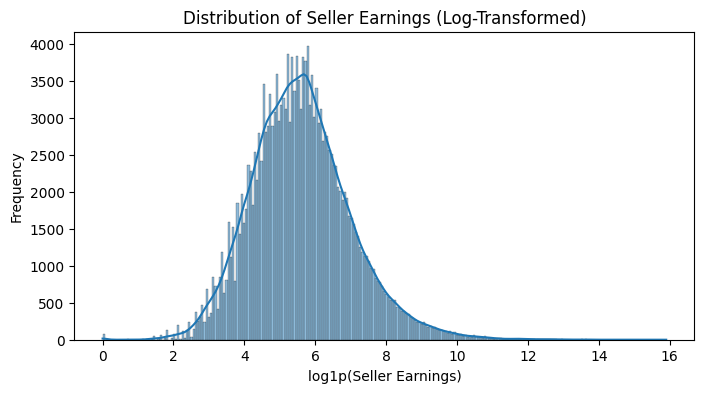

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 4))
sns.histplot(seller_df['seller_earning_log'], kde=True)
plt.title("Distribution of Seller Earnings (Log-Transformed)")
plt.xlabel("log1p(Seller Earnings)")
plt.ylabel("Frequency")
plt.show()


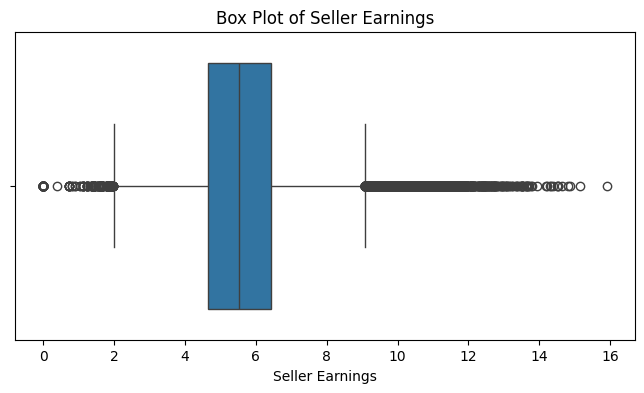

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=seller_df['seller_earning_log'])
plt.title("Box Plot of Seller Earnings")
plt.xlabel("Seller Earnings")
plt.show()

## Modeling

### KMeans Clustering for Deviding Seller Types

In [ ]:
from sklearn.cluster import KMeans

# Fit K-means with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
seller_df['cluster'] = kmeans.fit_predict(seller_df[['seller_earning_log']])

# Check cluster centers to decide which cluster represents high revenue
centers = kmeans.cluster_centers_
print("Cluster centers (log-transformed):", centers)

# Assign names based on which cluster has a higher center
high_cluster = np.argmax(centers)
seller_df['earning_group'] = np.where(seller_df['cluster'] == high_cluster, 'High Revenue', 'Regular')

print(seller_df['earning_group'].value_counts())

Cluster centers (log-transformed): [[6.86650957]
 [4.65635668]]
earning_group
Regular         106976
High Revenue     79840
Name: count, dtype: int64


In [ ]:
seller_df.head()

,product_like_count,product_like_count_avg,seller_products_sold,seller_products_sold_avg,seller_num_products_listed,seller_pass_rate,seller_num_followers,price_usd,seller_price,buyers_fees,discount_rate,buyers_fees_rate,seller_earning,product_gender_target,product_gender_target_cat,product_condition_cat,seller_badge_cat,usually_ships_within_cat,seller_country_topk,seller_earning_log,cluster,earning_group
0,13.0,13.000000,63.0,63.0,2.0,98.0,3972.0,204.48,170.40,34.08,0.200000,0.200000,170.40,Women,0,3,1,1,France,5.144000,1,Regular
1,17.0,17.000000,51.0,51.0,3.0,76.0,321.0,562.32,468.60,93.72,0.200000,0.200000,407.68,Women,0,3,1,1,France,6.012932,0,High Revenue
2,14.0,4.666667,250.0,250.0,5.0,96.0,993.0,230.04,191.70,38.34,0.200000,0.200000,685.65,Men,1,3,1,3,France,6.531825,0,High Revenue
3,4.0,4.000000,256.0,256.0,13.0,93.0,768.0,76.68,63.90,12.78,0.200000,0.200000,53.25,Men,1,2,2,1,France,3.993603,1,Regular
4,22.0,11.000000,411.0,411.0,8.0,96.0,585583.0,467.75,389.79,77.96,0.200012,0.200012,779.58,Women,0,2,3,1,France,6.660037,0,High Revenue


### Classification Models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Filter the dataframe for clusters 0 and 1
df_filtered = seller_df[seller_df["cluster"].isin([0, 1])].copy()

# One-hot encode 'seller_country_topk' and 'product_gender_target'
# drop_first=True to avoid multicollinearity if needed.
df_encoded = pd.get_dummies(df_filtered, columns=["seller_country_topk"], drop_first=True)


#### Baseline: Logistic
Accuracy: 0.66

In [ ]:

# Define target and predictors.
# Drop columns as specified (adjust as needed for your use case).
X = df_encoded.drop(columns=["cluster", "earning_group", "product_like_count",
                              "seller_products_sold", "seller_products_sold_avg",
                              "seller_num_followers", "price_usd", "seller_price",
                              "buyers_fees", "seller_earning", "product_gender_target",
                              "seller_earning_log"])
y = df_encoded["cluster"]

# Scale the features.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train a logistic regression model.
logreg = LogisticRegression(random_state=42, max_iter=1000)  # max_iter increased for convergence
logreg.fit(X_train, y_train)

# Make predictions on the test set.
y_pred = logreg.predict(X_test)

# Evaluate the model.
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6580130607001392
              precision    recall  f1-score   support

           0       0.68      0.38      0.49     16092
           1       0.65      0.87      0.74     21272

    accuracy                           0.66     37364
   macro avg       0.67      0.62      0.62     37364
weighted avg       0.66      0.66      0.63     37364



#### Random Forest
Accuracy: 0.78

In [ ]:
# Define target and predictors.
# Drop target 'cluster' and any additional identifier/derived columns like 'earning_group' if not needed.
X = df_encoded.drop(columns=["cluster", "earning_group", "product_like_count",
                "seller_products_sold", "seller_products_sold_avg",
                "seller_num_followers", "price_usd",	"seller_price",	"buyers_fees", "seller_earning", "product_gender_target", "seller_earning_log"])
y = df_encoded["cluster"]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Display feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False))

Accuracy: 0.7799753773685901
              precision    recall  f1-score   support

           0       0.76      0.72      0.74     16092
           1       0.80      0.82      0.81     21272

    accuracy                           0.78     37364
   macro avg       0.78      0.77      0.77     37364
weighted avg       0.78      0.78      0.78     37364

product_like_count_avg                0.197973
buyers_fees_rate                      0.195298
seller_num_products_listed            0.181792
discount_rate                         0.168965
seller_pass_rate                      0.078095
product_condition_cat                 0.039481
seller_badge_cat                      0.025424
usually_ships_within_cat              0.020171
product_gender_target_cat             0.016296
seller_country_topk_Italy             0.007920
seller_country_topk_France            0.007919
seller_country_topk_Other             0.005932
seller_country_topk_United Kingdom    0.005917
seller_country_topk_United States

#### Gredient Boost
Accuray: 0.78

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Define target and predictors.
# Drop target 'cluster' and any additional identifier/derived columns if not needed.
X = df_encoded.drop(columns=["cluster", "earning_group", "product_like_count",
                              "seller_products_sold", "seller_products_sold_avg",
                              "seller_num_followers", "price_usd", "seller_price",
                              "buyers_fees", "seller_earning", "product_gender_target",
                              "seller_earning_log"])
y = df_encoded["cluster"]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting classifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = gbc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Display feature importances
importances = pd.Series(gbc.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False))


Accuracy: 0.7811797452092923
              precision    recall  f1-score   support

           0       0.78      0.69      0.73     16092
           1       0.78      0.85      0.82     21272

    accuracy                           0.78     37364
   macro avg       0.78      0.77      0.77     37364
weighted avg       0.78      0.78      0.78     37364

buyers_fees_rate                      0.362401
seller_num_products_listed            0.281990
discount_rate                         0.206055
product_like_count_avg                0.128513
product_condition_cat                 0.008470
product_gender_target_cat             0.003511
seller_country_topk_Italy             0.002430
seller_country_topk_United States     0.002203
seller_badge_cat                      0.002005
seller_pass_rate                      0.001933
seller_country_topk_Greece            0.000335
seller_country_topk_Hong Kong         0.000099
seller_country_topk_Portugal          0.000032
seller_country_topk_United Kingdo

#### XGBoost
Accuray: 0.80

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

# Scale the features.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train an XGBoost classifier.
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)

# Make predictions and evaluate the model.
y_pred = xgb_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


importances = pd.Series(xgb_clf.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:16:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8022428005566856
              precision    recall  f1-score   support

           0       0.80      0.71      0.76     16092
           1       0.80      0.87      0.83     21272

    accuracy                           0.80     37364
   macro avg       0.80      0.79      0.80     37364
weighted avg       0.80      0.80      0.80     37364

buyers_fees_rate                      0.202509
seller_num_products_listed            0.153802
discount_rate                         0.104472
product_like_count_avg                0.085420
seller_country_topk_United States     0.045917
seller_country_topk_Italy             0.036501
product_gender_target_cat             0.033591
seller_country_topk_Greece            0.031323
seller_country_topk_United Kingdom    0.028802
product_condition_cat                 0.028302
seller_country_topk_Sweden            0.021426
seller_badge_cat                      0.018829
seller_country_topk_Poland            0.018563
seller_country_topk_Ireland      

#### LightGBM
Accuracy: 0.82

In [ ]:
import lightgbm as lgb

# Define target and predictors.
# Dropping columns as specified.
X = df_encoded.drop(columns=["cluster", "earning_group", "product_like_count",
                              "seller_products_sold", "seller_products_sold_avg",
                              "seller_num_followers", "price_usd", "seller_price",
                              "buyers_fees", "seller_earning", "product_gender_target",
                              "seller_earning_log"])
y = df_encoded["cluster"]

# Scale the features.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a LightGBM classifier.
lgbm_clf = lgb.LGBMClassifier(random_state=42)
lgbm_clf.fit(X_train, y_train)

# Make predictions and evaluate the model.
y_pred = lgbm_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Display feature importances.
importances = pd.Series(lgbm_clf.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False))


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 85704, number of negative: 63748
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023839 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 149452, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.573455 -> initscore=0.295962
[LightGBM] [Info] Start training from score 0.295962


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Accuracy: 0.8192377689754844
              precision    recall  f1-score   support

           0       0.81      0.76      0.78     16092
           1       0.83      0.86      0.84     21272

    accuracy                           0.82     37364
   macro avg       0.82      0.81      0.81     37364
weighted avg       0.82      0.82      0.82     37364

buyers_fees_rate                      887
discount_rate                         847
product_like_count_avg                569
seller_num_products_listed            353
seller_pass_rate                       66
product_condition_cat                  57
seller_country_topk_United Kingdom     42
product_gender_target_cat              30
seller_country_topk_Italy              26
seller_badge_cat                       24
seller_country_topk_United States      18
seller_country_topk_Greece             14
seller_country_topk_Poland             13
usually_ships_within_cat               12
seller_country_topk_France             11
seller_country

#### Fine Tuning for LightGBM
Accuracy: 0.83

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle

# Define target and predictors.
# Dropping columns as specified.
X = df_encoded.drop(columns=["cluster", "earning_group", "product_like_count",
                              "seller_products_sold", "seller_products_sold_avg",
                              "seller_num_followers", "price_usd", "seller_price",
                              "buyers_fees", "seller_earning", "product_gender_target",
                              "seller_earning_log"])
y = df_encoded["cluster"]

# Scale the features.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Set up the parameter grid for tuning.
param_grid = {
    'num_leaves': [31, 50, 70],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 500],
    'min_child_samples': [20, 30, 50]
}

# Initialize the LightGBM classifier.
lgbm_clf = lgb.LGBMClassifier(random_state=42)

# Set up GridSearchCV. Using 3-fold CV and accuracy as the scoring metric.
grid_search = GridSearchCV(estimator=lgbm_clf,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3,
                           n_jobs=-1,
                           verbose=1)

# Fit the grid search to the training data.
grid_search.fit(X_train, y_train)

# Output the best parameters and best CV score.
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Retrieve the best estimator from GridSearchCV.
seller_classifier = grid_search.best_estimator_
# Evaluate the tuned model on the test set.
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test set accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Display feature importances.
importances = pd.Series(best_model.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False))


Fitting 3 folds for each of 243 candidates, totalling 729 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 85704, number of negative: 63748
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036024 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 149452, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.573455 -> initscore=0.295962
[LightGBM] [Info] Start training from score 0.295962
Best parameters found: {'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 30, 'n_estimators': 500, 'num_leaves': 50}
Best cross-validation accuracy: 0.8277573992997116


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Test set accuracy: 0.8291938764586233
              precision    recall  f1-score   support

           0       0.82      0.77      0.80     16092
           1       0.84      0.87      0.85     21272

    accuracy                           0.83     37364
   macro avg       0.83      0.82      0.82     37364
weighted avg       0.83      0.83      0.83     37364

discount_rate                         5259
product_like_count_avg                5130
buyers_fees_rate                      4875
seller_num_products_listed            3555
seller_pass_rate                      2133
product_condition_cat                  831
product_gender_target_cat              490
seller_badge_cat                       456
usually_ships_within_cat               365
seller_country_topk_United Kingdom     231
seller_country_topk_Italy              217
seller_country_topk_France             154
seller_country_topk_United States       96
seller_country_topk_Other               93
seller_country_topk_Spain        

#### Feature Importance Analysis

- **discount_rate (5259)**:

  This is the most important feature in your model. It means that variations in the discount rate play a major role in predicting the seller type.

- **product_like_count_avg (5130)** and **buyers_fees_rate (4875)**:

  These features are nearly as influential as discount_rate. They suggest that the average product like count and the buyer fees rate are critical for the model, indicating that both consumer engagement and fee-related factors strongly impact seller performance.

- **seller_num_products_listed (3555)** and **seller_pass_rate (2133)**:

  These features also contribute significantly. The number of products listed by a seller and the seller's pass rate (an indicator of reliability) have meaningful influence, though not as much as the top three features.

- **product_condition_cat (831)**, **product_gender_target_cat (490)**, **seller_badge_cat (456)**, **usually_ships_within_cat (365)**:

  These mid-range values indicate that product condition, target gender, badge category, and shipping time (or method) contribute to the predictions but are less decisive than price related features or product engagement metrics.

- **Seller country features (ranging from 20 to 231)**:

  Features like seller_country_topk_United Kingdom, seller_country_topk_Italy, etc., have lower importance values. This suggests that while geographic factors do have some effect on the outcome, they are less critical compared to pricing, engagement, and seller activity features.

**Overall Interpretation**
- Top Influencers:

  Discount rate, average product like count, and buyer fees rate are the strongest predictors. They capture core aspects of pricing strategy and customer engagement.

- Moderate Contributors:
  
  Seller activity metrics (like number of products listed and pass rate) also play a significant role, reflecting the importance of seller reliability and inventory.

- Less Influential Factors:

  Various seller country features and categorical aspects like product condition and gender target provide additional nuance but are less influential overall.

In summary, your model primarily bases its predictions on pricing (discount_rate), customer interaction (product_like_count_avg), and fee structure (buyers_fees_rate), with seller activity and geographical factors providing supplementary information.

### **Businesss Insights**

- **Fair Pricing Strategy**:

  Discount Rate is Key: Fair discounting drives sales; encourage sellers to set competitive, yet fair prices.

  Balance Discounts and Value: Sellers should optimize discounts without devaluing the product.
- **Emphasize Product Quality**:

  Quality Drives Engagement: High product like counts signal that buyers value quality; push sellers to maintain and showcase product quality.

  Accurate Condition Reporting: Encourage detailed and honest product condition descriptions to build trust.
- **Seller Reliability**:

  Consistency Matters: Higher seller pass rates and active listings correlate with better performance.

  Support & Incentives: Offer training and rewards for maintaining quality and fair pricing.

### Causal Inference

#### Uplift Random Forest

In [ ]:
!pip install causalml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.3/144.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from causalml.inference.tree import UpliftRandomForestClassifier

# Make "Seller Badge" Treatment

# Define the predictors by dropping the outcome, treatment, and other non-feature columns.
drop_cols = [
    "cluster", "earning_group", "product_like_count",
    "seller_products_sold", "seller_products_sold_avg",
    "seller_num_followers", "price_usd", "seller_price",
    "buyers_fees", "seller_earning", "product_gender_target",
    "seller_earning_log", "seller_badge_cat"
]
X = df_encoded.drop(columns=drop_cols)

# Scale features.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define outcome.
y = df_encoded["cluster"]

# We assume:
#   seller_badge_cat == 1  --> Common badge  --> Treatment = "0"
#   seller_badge_cat in {2, 3}  --> Trusted/Expert badge  --> Treatment = "1"
treatment = np.where(df_encoded["seller_badge_cat"] == 1, "0", "1")

# Initialize the Uplift Random Forest.
uplift_rf = UpliftRandomForestClassifier(
    control_name="0",            # Control group defined as treatment == "0" (no badge)
    n_estimators=200,
    max_depth=5,
    min_samples_leaf=100,
    evaluationFunction='KL',   # Use Kullback–Leibler divergence as the splitting criterion
    n_reg=100                  # Regularization parameter (may require tuning)
)

# Fit the uplift model.
uplift_rf.fit(X=X_scaled, treatment=treatment, y=y)

# The predicted uplift for each observation is defined as:
uplift_preds = uplift_rf.predict(X_scaled)

# Display the first 10 predicted uplift scores.
print("Uplift Predictions (first 10):", uplift_preds[:10])

uplift_results = pd.DataFrame({
    'uplift': uplift_preds,
    'y_true': y,
    'treatment': treatment
})
print(uplift_results.head())


In [ ]:
# Flatten the uplift predictions
uplift_preds_flat = uplift_preds.flatten()

# Combine the predictions with the outcome and treatment for further analysis.
uplift_results = pd.DataFrame({
    'uplift': uplift_preds_flat,
    'y_true': y,
    'treatment': treatment
})
print(uplift_results.head())


     uplift  y_true treatment
0 -0.211840       1         0
1 -0.218660       0         0
2 -0.146079       0         0
3 -0.221776       1         1
4 -0.217280       0         1


- Row 0:

  uplift: -0.211840

  y_true: 1 (not top seller)

  treatment: 0 (common badge)

  Interpretation:

  This seller, who currently does not have the advacnce badge (treatment 0) and is not a top seller, is estimated to benefit from treatment. The model predicts that if they had the badge, their probability of not being a top seller would drop by about 21.2 percentage points, which implies a 21.2 percentage point increase in the chance of being a top seller.

- Row 1:

  uplift: -0.218660

  y_true: 0 (top seller)

  treatment: 0 (common badge)

  Interpretation:

  This seller is currently a top seller without a advance badge. However, the model estimates that if they received the badge, their probability of not being a top seller would decrease by approximately 21.9 percentage points compared to remaining untreated. This suggests that adding the badge would further improve their performance, reinforcing their top-seller status.

- Row 2:

  uplift: -0.146079

  y_true: 0 (top seller)

  treatment: 0 (common badge)

  Interpretation:

  This top-selling seller (y_true = 0) currently lacks the badge. The model estimates that if they were treated (had the badge), their chance of not being a top seller would drop by about 14.6 percentage points, indicating a beneficial effect from acquiring the badge.

- Row 3:

  uplift: -0.221776
  
  y_true: 1 (not top seller)
  
  treatment: 1 (advance badge)
  
  Interpretation:
  
  This seller already has the badge (treatment = 1) but is not a top seller. The predicted uplift here indicates that, compared to the control scenario (if they did not have the badge), the presence of the badge is associated with a 22.2 percentage point lower probability of not being a top seller. In other words, the badge is estimated to improve their performance significantly—even though in this instance the seller is not yet a top seller.

- Row 4:

  uplift: -0.217280
  
  y_true: 0 (top seller)
  
  treatment: 1 (advance badge)
  
  Interpretation:
  
  This seller is already a top seller and has the badge. The model estimates that the badge reduces the probability of not being a top seller by about 21.7 percentage points compared to the control condition. This confirms that having the badge is beneficial for maintaining or enhancing top seller status.

- **Overall Summary**

  Negative uplift values across the board indicate a beneficial effect of having an advanced badge.

  They show that when treated (i.e., when a seller has the badge), the predicted probability of not being a top seller decreases relative to the control group.

  The magnitude (roughly between -14.6% and -22.2%) suggests that the badge is associated with a 15 - 22 percentage point improvement in the likelihood of being a top seller.

  These results imply that, according to the uplift model, receiving the badge (treatment) is expected to in

### Business Insights

- **Boosted Seller Success:**  
  Advanced badges significantly improve seller performance by increasing the chance of becoming a top seller by approximately 15-22%. This boost translates into higher visibility and greater buyer trust, ultimately driving more sales and increased earnings for sellers.

- **Motivate Badge Upgrades:**  
  The platform should actively encourage sellers to pursue advanced badges using targeted communications and in-app incentives. Sharing success stories and providing clear guides on how to upgrade can motivate sellers to invest in improving their performance.

- **Enhanced Badge System:**  
  Implementing a comprehensive, tiered badge system rewards sellers for quality, reliability, and customer engagement. Multiple badge levels offer clear improvement benchmarks and foster continuous growth among the seller community.

- **Increased Platform Revenue:**  
  Sellers with advanced badges tend to perform better, which directly drives higher sales and increases the platform's commission revenue. By promoting fair pricing and high-quality listings, the platform can create a more attractive marketplace for buyers.

- **Exclusive Seller Benefits:**  
  Offering perks like enhanced visibility, reduced fees, and priority support can further incentivize sellers to achieve advanced badge status. These exclusive benefits not only reward high performance but also set a standard that inspires all sellers to improve.
